In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sentiment = pd.read_csv("data/Sentiment dataset.csv")

In [3]:
sentiment.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
sentiment.shape

(732, 15)

## Data Analysis

In [5]:
sentiment.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [6]:
sentiment.duplicated().sum()

np.int64(0)

In [7]:
pd.DataFrame(sentiment['Sentiment'].value_counts()).reset_index()

,Sentiment,count
0,Positive,44
1,Joy,42
2,Excitement,32
3,Happy,14
4,Neutral,14
...,...,...
274,Vibrancy,1
275,Culinary Adventure,1
276,Mesmerizing,1
277,Thrilling Journey,1


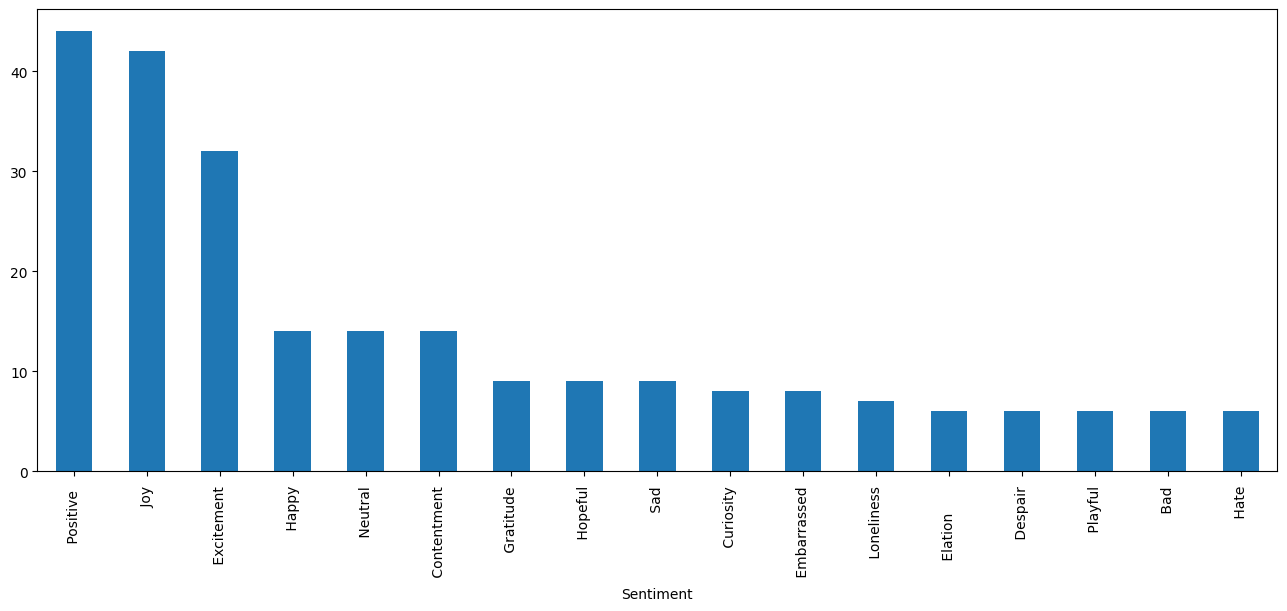

In [8]:
plt.figure(figsize=(16,6))

mycounts = sentiment['Sentiment'].value_counts()

mycounts[mycounts > 5].plot(kind='bar')

plt.show()

In [9]:
pd.DataFrame(sentiment['Platform'].value_counts()).reset_index()

,Platform,count
0,Instagram,258
1,Facebook,231
2,Twitter,128
3,Twitter,115


In [10]:
sentiment.head(1)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


In [11]:
sentiment.drop(columns=['Unnamed: 0.1','Unnamed: 0','User','Year','Month','Day','Hour'], inplace=True)

In [12]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   Platform   732 non-null    object 
 4   Hashtags   732 non-null    object 
 5   Retweets   732 non-null    float64
 6   Likes      732 non-null    float64
 7   Country    732 non-null    object 
dtypes: float64(2), object(6)
memory usage: 45.9+ KB


## Understanding

- Sentiment has 279 different type so at first we will group similar type of emotion then assign all with value less than 10 or 5 to be other
- The platform has twitter appear twice we should combine that
- Work on the text column to clean it

In [ ]:
emotion_group_map = {
    'Positive': ['positive', 'happy', 'joy', 'love', 'gratitude', 'satisfaction', 'amusement', 'cheerful', 'thrilled', 
                 'overjoyed', 'excited', 'proud', 'strong', 'assured', 'empowerment', 'delighted', 'contentment', 'enjoyment', 
                 'playful', 'happiness', 'admiration', 'affection', 'kind', 'pride', 'compassion', 'tenderness', 'enthusiasm'
                 ,'Excitement','Elation','Hopeful', 'Grateful', 'Ecstasy', 'Positivity',],

    'Negative': ['negative', 'sad', 'anger', 'fear', 'disgust', 'gloom', 'depressed', 'melancholy', 'regret', 'furious', 
                 'mad', 'irritated', 'annoyed', 'anxious', 'scared', 'worried', 'terrified', 'despair', 'resentment', 
                 'frustration', 'sadness', 'grief', 'loneliness', 'jealousy', 'bitter', 'confusion', 'shame', 'disappointed', 
                 'intimidation', 'helplessness', 'envy', 'hate', 'bad', 'embarrassed', 'mischievous','Fearful', 'Betrayal', 'Devastated',
                 'Envious', 'Frustrated','Sorrow', 'Suffering','Jealous','Overwhelmed' ,'Disappointment', 'Numbness','Desperation', 'Isolation'],

    'Neutral': ['neutral', 'indifference', 'bored', 'uninterested', 'boredom', 'curious', 'curiosity', 'interested', 
                'inquisitive', 'fascinated', 'whispers of the past', 'ocean\'s freedom', 'runway creativity',
                'Surprise','Calmness','Creative Inspiration','awe','Nostalgia', 'Ambivalence','Captivation', 'Accomplishment',
                'Inspiration', 'Inspired', 'Creativity', 'Arousal', 'Kindness', 'Friendship', 'Thrill', 'relief','Anticipation',
                 'fulfillment', 'Motivation', 'Success','Adoration', 'Compassionate', 'Hope','Acceptance'],
                
    'Other': []
}



In [14]:
def change_emotion(emotion):
    emotion_lower = emotion.lower().strip()
    for group, synonyms in emotion_group_map.items():
        if emotion_lower in [syn.lower().strip() for syn in synonyms]:
            return group
    return 'Other'

In [15]:
sentiment['MappedSentiment'] = sentiment['Sentiment'].apply(change_emotion)

In [16]:
print(sentiment['MappedSentiment'].value_counts())

MappedSentiment
Positive    262
Other       167
Negative    161
Neutral     142
Name: count, dtype: int64


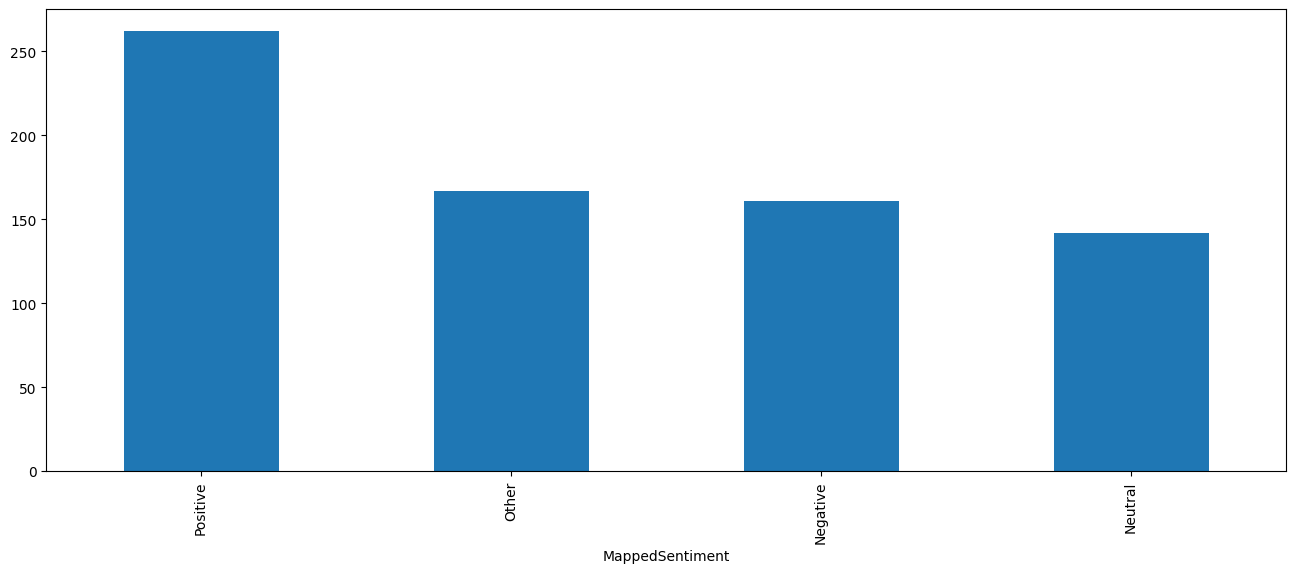

In [17]:
plt.figure(figsize=(16,6))

mycounts = sentiment['MappedSentiment'].value_counts()

mycounts.plot(kind='bar')

plt.show()

In [18]:
sentiment.sample(10)

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Country,MappedSentiment
513,Rocking out to the guitar solos at a Queen tri...,Nostalgia,2018-12-02 22:15:00,Instagram,#Nostalgia #QueenTribute,22.0,45.0,UK,Neutral
257,"Navigating the sea of hope, sailing towards t...",Hopeful,2023-10-05 07:30:00,Facebook,#Hopeful #SunriseOfPossibilities,12.0,24.0,USA,Positive
717,Participating in a debate club to enhance crit...,Neutral,2023-10-15 20:45:00,Twitter,#DebateSkills #HighSchoolIntellect,22.0,43.0,Canada,Neutral
463,"Betrayal, a venomous serpent slithering throug...",Betrayal,2021-03-02 17:45:00,Instagram,#Betrayal #PoisonedTrust,25.0,50.0,Canada,Negative
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,Positive
642,Survived a challenging physics exam. Equations...,Relief,2023-08-01 13:30:00,Instagram,#PhysicsSurvivor #HighSchoolAdventures,20.0,40.0,USA,Neutral
551,"In the tennis tournament, a highly anticipated...",Frustration,2018-07-10 21:15:00,Instagram,#Frustration #TennisSetback,35.0,70.0,USA,Negative
32,Coding a new project with enthusiasm. ...,Positive,2023-01-25 13:15:00,Facebook,#Coding #Enthusiasm,30.0,60.0,USA,Positive
220,A melancholic symphony playing in the backgro...,Melancholy,2019-03-25 21:00:00,Twitter,#Melancholy #WistfulHeart,13.0,26.0,Canada,Negative
471,"Laughter echoes in the air, a chorus of happin...",Happiness,2018-04-12 18:30:00,Twitter,#Happiness #SpiritLifter,35.0,70.0,Canada,Positive


For text
- Lower case
- tokenize
- remove special characters
- remove stop words and punctuation
- stemming

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bijay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import string

from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

tokenizer = TreebankWordTokenizer()

stop_words = set(stopwords.words('english'))

def transform_text(text):
    text = text.lower()
    tokens = tokenizer.tokenize(text)

    filtered = [ps.stem(i) for i in tokens if i.isalnum() and i not in stop_words]

    return ' '.join(filtered)

In [22]:
transform_text("Hi how are you, Bijay %% ? Loving your codes")

'hi bijay love code'

In [23]:
sentiment['Text'] = sentiment['Text'].apply(transform_text)

In [24]:
sentiment.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Country,MappedSentiment
0,enjoy beauti day park,Positive,2023-01-15 12:30:00,Twitter,#Nature #Park,15.0,30.0,USA,Positive
1,traffic terribl morn,Negative,2023-01-15 08:45:00,Twitter,#Traffic #Morning,5.0,10.0,Canada,Negative
2,finish amaz workout,Positive,2023-01-15 15:45:00,Instagram,#Fitness #Workout,20.0,40.0,USA,Positive
3,excit upcom weekend getaway,Positive,2023-01-15 18:20:00,Facebook,#Travel #Adventure,8.0,15.0,UK,Positive
4,tri new recip dinner tonight,Neutral,2023-01-15 19:55:00,Instagram,#Cooking #Food,12.0,25.0,Australia,Neutral


In [25]:
sentiment['Timestamp'] = pd.to_datetime(sentiment['Timestamp'])
sentiment['Likes'] = sentiment['Likes'].astype(int)
sentiment['Retweets'] = sentiment['Retweets'].astype(int)

In [26]:
sentiment.drop(columns=['Sentiment'], inplace=True)

In [27]:
sentiment.head(5)

,Text,Timestamp,Platform,Hashtags,Retweets,Likes,Country,MappedSentiment
0,enjoy beauti day park,2023-01-15 12:30:00,Twitter,#Nature #Park,15,30,USA,Positive
1,traffic terribl morn,2023-01-15 08:45:00,Twitter,#Traffic #Morning,5,10,Canada,Negative
2,finish amaz workout,2023-01-15 15:45:00,Instagram,#Fitness #Workout,20,40,USA,Positive
3,excit upcom weekend getaway,2023-01-15 18:20:00,Facebook,#Travel #Adventure,8,15,UK,Positive
4,tri new recip dinner tonight,2023-01-15 19:55:00,Instagram,#Cooking #Food,12,25,Australia,Neutral


In [28]:
sentiment['Hashtags'].value_counts()

Hashtags
#Compassionate #TearsOfEmpathy                 3
#Proud #ScalingPeaks                           3
#Hopeful #SeedsOfOptimism                      3
#Playful #CarnivalEscapade                     3
#Hopeful #SailorOfDreams                       2
                                              ..
#ScienceFairWinner #HighSchoolScience          1
#SurpriseCelebration #HighSchoolFriendship     1
#CommunityGiving #HighSchoolPhilanthropy       1
#CulturalCelebration #HighSchoolUnity          1
#TeamSpirit #HighSchoolProjects                1
Name: count, Length: 697, dtype: int64

In [29]:
def remove_hash(text):
    return ', '.join(i.strip('#') for i in text.split())

In [30]:
remove_hash('#Travel #Adventure')

'Travel, Adventure'

In [31]:
sentiment['Hashtags'] = sentiment['Hashtags'].apply(remove_hash)

In [32]:
sentiment.head(5)

,Text,Timestamp,Platform,Hashtags,Retweets,Likes,Country,MappedSentiment
0,enjoy beauti day park,2023-01-15 12:30:00,Twitter,"Nature, Park",15,30,USA,Positive
1,traffic terribl morn,2023-01-15 08:45:00,Twitter,"Traffic, Morning",5,10,Canada,Negative
2,finish amaz workout,2023-01-15 15:45:00,Instagram,"Fitness, Workout",20,40,USA,Positive
3,excit upcom weekend getaway,2023-01-15 18:20:00,Facebook,"Travel, Adventure",8,15,UK,Positive
4,tri new recip dinner tonight,2023-01-15 19:55:00,Instagram,"Cooking, Food",12,25,Australia,Neutral


In [33]:
sentiment['Platform'] = sentiment['Platform'].str.strip().str.lower()

In [34]:
sentiment['Platform'].value_counts()

Platform
instagram    258
twitter      243
facebook     231
Name: count, dtype: int64

In [35]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Text             732 non-null    object        
 1   Timestamp        732 non-null    datetime64[ns]
 2   Platform         732 non-null    object        
 3   Hashtags         732 non-null    object        
 4   Retweets         732 non-null    int64         
 5   Likes            732 non-null    int64         
 6   Country          732 non-null    object        
 7   MappedSentiment  732 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 45.9+ KB


<Axes: xlabel='MappedSentiment'>

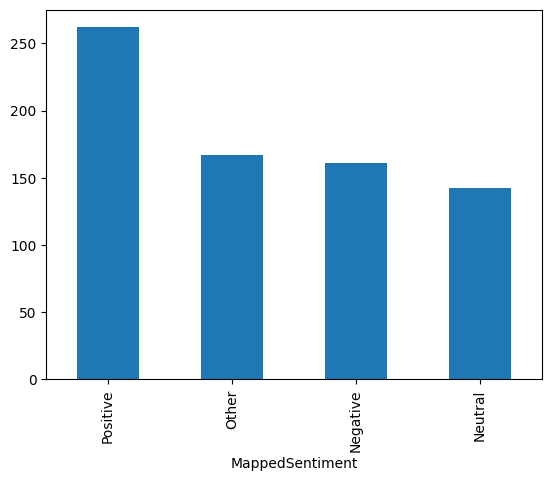

In [36]:
sentiment['MappedSentiment'].value_counts().plot(kind='bar')

<Axes: xlabel='Platform'>

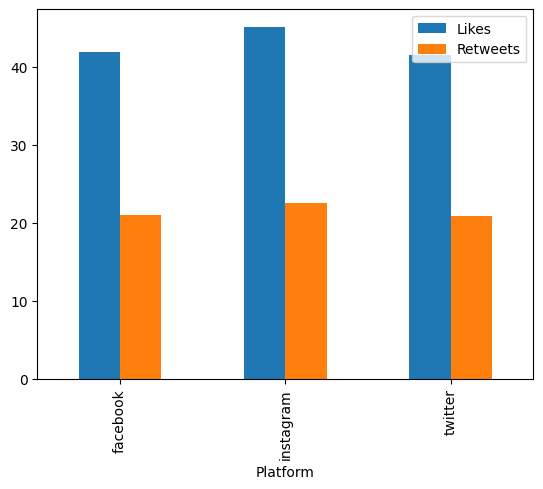

In [37]:
sentiment.groupby('Platform')[['Likes', 'Retweets']].mean().plot(kind='bar')

<Axes: xlabel='Timestamp'>

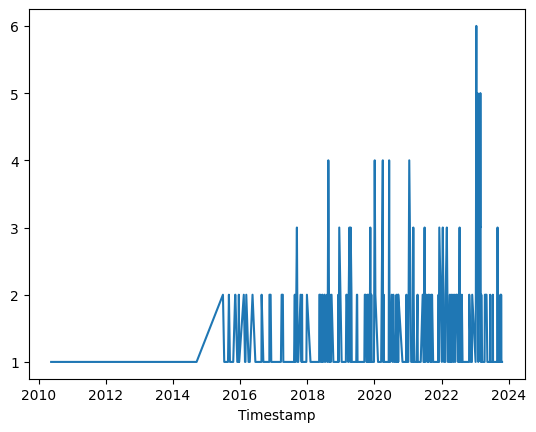

In [38]:
sentiment['Timestamp'].dt.date.value_counts().sort_index().plot()

<Axes: >

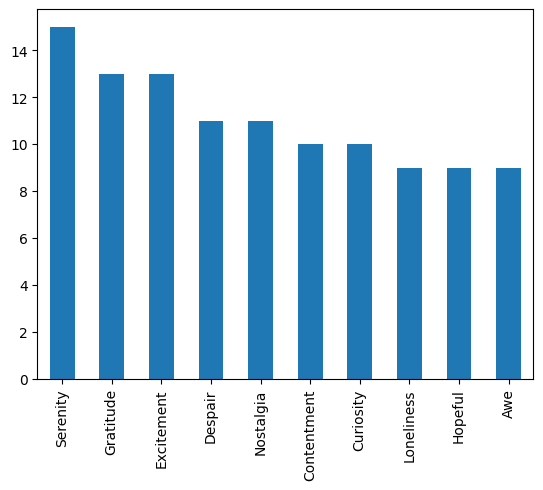

In [39]:
from collections import Counter

hashtag_list = sentiment['Hashtags'].str.split(', ').sum()
hashtag_counts = Counter(hashtag_list)
pd.Series(hashtag_counts).sort_values(ascending=False).head(10).plot(kind='bar')

In [40]:
sentiment['Text'][2]

'finish amaz workout'

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sentiment['Platform_encoded'] = le.fit_transform(sentiment['Platform'])

In [42]:
sentiment = pd.get_dummies(sentiment, columns=['Platform_encoded'], drop_first=True, dtype=int)

In [43]:
sentiment.head()

,Text,Timestamp,Platform,Hashtags,Retweets,Likes,Country,MappedSentiment,Platform_encoded_1,Platform_encoded_2
0,enjoy beauti day park,2023-01-15 12:30:00,twitter,"Nature, Park",15,30,USA,Positive,0,1
1,traffic terribl morn,2023-01-15 08:45:00,twitter,"Traffic, Morning",5,10,Canada,Negative,0,1
2,finish amaz workout,2023-01-15 15:45:00,instagram,"Fitness, Workout",20,40,USA,Positive,1,0
3,excit upcom weekend getaway,2023-01-15 18:20:00,facebook,"Travel, Adventure",8,15,UK,Positive,0,0
4,tri new recip dinner tonight,2023-01-15 19:55:00,instagram,"Cooking, Food",12,25,Australia,Neutral,1,0


In [44]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Text                732 non-null    object        
 1   Timestamp           732 non-null    datetime64[ns]
 2   Platform            732 non-null    object        
 3   Hashtags            732 non-null    object        
 4   Retweets            732 non-null    int64         
 5   Likes               732 non-null    int64         
 6   Country             732 non-null    object        
 7   MappedSentiment     732 non-null    object        
 8   Platform_encoded_1  732 non-null    int64         
 9   Platform_encoded_2  732 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 57.3+ KB


In [45]:
sentiment['SentimentEncoded'] = le.fit_transform(sentiment['MappedSentiment'])

In [46]:
sentiment.corr(numeric_only=True)

,Retweets,Likes,Platform_encoded_1,Platform_encoded_2,SentimentEncoded
Retweets,1.000000,0.998482,0.114232,-0.064746,0.279795
Likes,0.998482,1.000000,0.114620,-0.067186,0.277014
Platform_encoded_1,0.114232,0.114620,1.000000,-0.520079,0.027500
Platform_encoded_2,-0.064746,-0.067186,-0.520079,1.000000,-0.027265
SentimentEncoded,0.279795,0.277014,0.027500,-0.027265,1.000000


In [47]:
sentiment['Country'].value_counts()

Country
USA           59
USA           55
UK            49
Canada        44
Australia     41
              ..
Ireland        1
Scotland       1
Kenya          1
Jamaica        1
Thailand       1
Name: count, Length: 115, dtype: int64

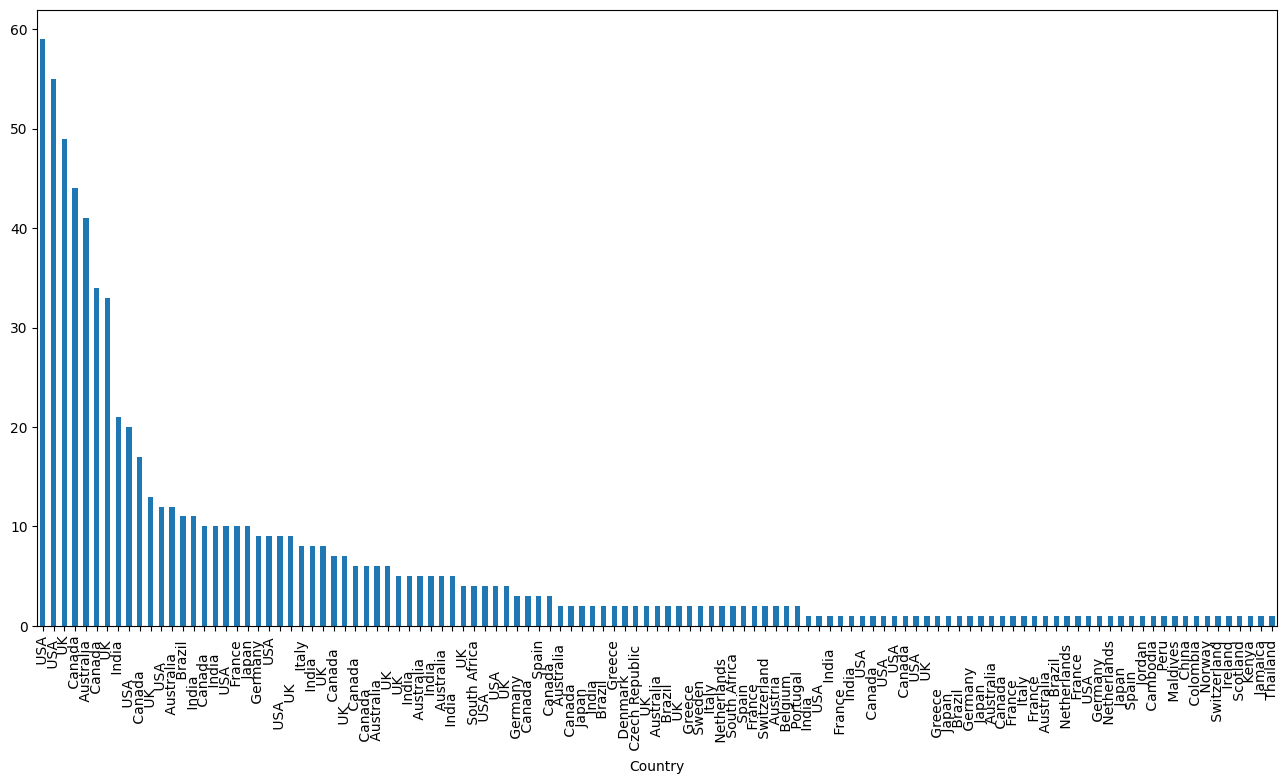

In [48]:
plt.figure(figsize=(16,8))
sentiment['Country'].value_counts().plot(kind='bar')
plt.show()

In [49]:
sentiment['Country'] = sentiment['Country'].str.strip().str.lower()

country_count = sentiment['Country'].value_counts()

high_count_countries = set(country_count[country_count > 20].index)


Country
usa          188
uk           143
canada       135
other        121
australia     75
india         70
Name: count, dtype: int64


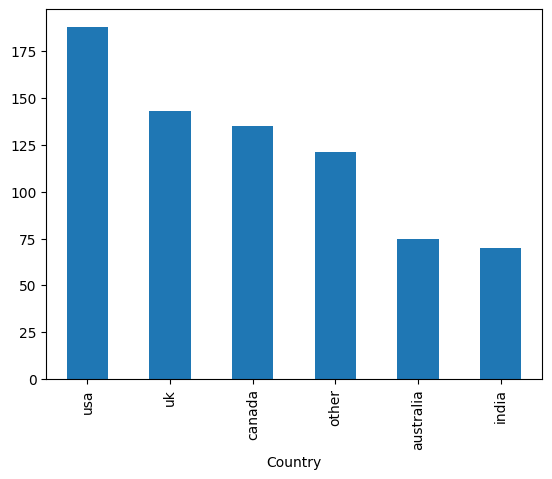

In [50]:
sentiment['Country'] = sentiment['Country'].apply(lambda x: x if x in high_count_countries else 'other')
sentiment['Country'].value_counts().plot(kind='bar')
print(sentiment['Country'].value_counts())

In [79]:
sentiment.sample(5)

,Text,Timestamp,Platform,Hashtags,Retweets,Likes,Country,MappedSentiment,Platform_encoded_1,Platform_encoded_2,SentimentEncoded,Country_encoded
197,lost vast sea inform indiffer wave digit ocean,2022-11-28 17:30:00,instagram,"Indifference, DigitalOverload",7,15,canada,Neutral,1,0,1,1
384,whisper inspir rustl leav seren forest,2016-11-15 11:45:00,facebook,"Inspiration, ForestWhispers",28,55,other,Neutral,0,0,1,3
621,join write group pen thought write journey dep...,2023-06-30 19:30:00,twitter,"SoulfulWriting, SeniorReflections",28,55,uk,Positive,0,1,3,4
482,symphoni excit note burst energi ignit soul fe...,2021-04-18 14:20:00,facebook,"Excitement, IgnitedSoul",30,60,uk,Positive,0,0,3,4
416,spark inspir ignit like shoot star night sky,2018-02-10 23:30:00,facebook,"Spark, InspirationIgnited",30,60,australia,Other,0,0,2,0


The sentiment encoded to be 
- Negative -> 0
- Neutral -> 1
- Other -> 2
- Positive -> 3

In [60]:
sentiment['Country_encoded'] = le.fit_transform(sentiment['Country'])

In [61]:
sentiment.to_csv('clean_data/sentiment.csv')

## Starting to model.
-Now we need to capture X and y which we will train_Test

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix

As for X -> we will use Text (using TF-IDF),Retweets, Likes,Platform_encoded_1, Platform_encoded_2,country_encoded 

In [100]:
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(sentiment['Text'])
y = sentiment['SentimentEncoded']

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

In [102]:
sentiment.shape

(732, 12)

In [103]:
# 500 features we added + the 5 features from sentiment
X_train.shape

(585, 500)

In [104]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [105]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score, confusion_matrix, classification_report

In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_score = r2_score(y_test,y_pred_lr)

print("R2 Score :", lr_score)

print("MSE      :", mean_squared_error(y_test,y_pred_lr))

R2 Score : -2.927025503959996
MSE      : 5.7063538721988


## Logistic Regression

In [107]:
log = LogisticRegression(max_iter=1000, class_weight='balanced')

log.fit(X_train, y_train)

y_pred_log = log.predict(X_test)

log_score = accuracy_score(y_test, y_pred_log)

print("Accuracy Score   :", log_score)

print(classification_report(y_test, y_pred_log))

print(confusion_matrix(y_test, y_pred_log))

Accuracy Score   : 0.6326530612244898
              precision    recall  f1-score   support

           0       0.69      0.66      0.68        38
           1       0.67      0.64      0.65        28
           2       0.44      0.52      0.48        29
           3       0.70      0.67      0.69        52

    accuracy                           0.63       147
   macro avg       0.63      0.62      0.62       147
weighted avg       0.64      0.63      0.64       147

[[25  1  8  4]
 [ 1 18  3  6]
 [ 8  1 15  5]
 [ 2  7  8 35]]


The sentiment encoded to be 
- Negative -> 0
- Neutral -> 1
- Other -> 2
- Positive -> 3

In [108]:
def predict_sentiment(text):
    vec = tfidf.transform([text])
    pred = log.predict(vec)[0]
    label_map = {0:'Negative', 1:'Neutral', 2:'Other', 3:'Positive'}
    return label_map.get(pred, "Unknown")

In [111]:
sample_text = "Its bad"

print("Predicted Sentiment:", predict_sentiment(sample_text))


Predicted Sentiment: Negative
